In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pickle
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [14]:
def load_npz_data():
    """
    Returns:
        tuple: (X_train, y_train, X_test, y_test)
    """
    train_file = '/kaggle/input/celeb-vector/train.npz'
    test_file = '/kaggle/input/celeb-vector/test.npz'
    
    
    # Tải train.npz
    train_data = np.load(train_file)
    X_train = train_data["embeddings"]
    y_train = train_data["labels"]
    
    # Tải test.npz
    test_data = np.load(test_file)
    X_test = test_data["embeddings"]
    y_test = test_data["labels"]
    
    print(f"Train data: {X_train.shape}, Labels: {y_train.shape}")
    print(f"Test data: {X_test.shape}, Labels: {y_test.shape}")
    # print(f"Nhãn duy nhất trong train: {np.unique(y_train)}")
    # print(f"Nhãn duy nhất trong test: {np.unique(y_test)}")
    
    return X_train, y_train, X_test, y_test

In [15]:
def plot_train_label_distribution(y_train):
    # Đếm số lượng từng nhãn
    labels, counts = np.unique(y_train, return_counts=True)

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 4))
    plt.bar([str(label) for label in labels], counts, color='skyblue')

    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title('Phân bố nhãn trong tập Train')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Train data: (1594, 512), Labels: (1594,)
Test data: (344, 512), Labels: (344,)


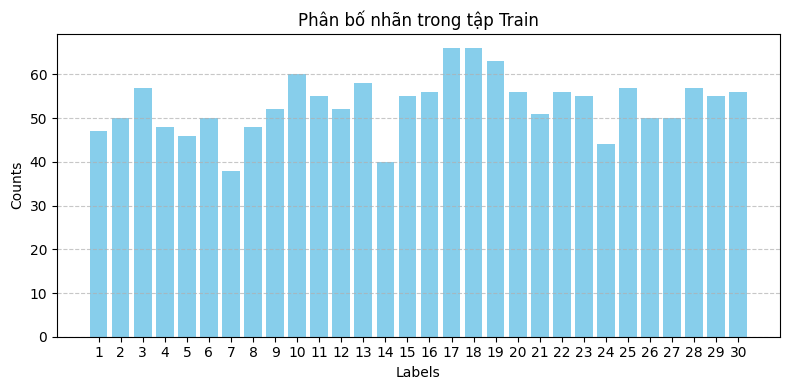

In [16]:
X_train, y_train, X_test, y_test = load_npz_data()

plot_train_label_distribution(y_train)


Huấn luyện Random Forest với các tham số tốt nhất...
Train Accuracy: 1.0000
Test Accuracy: 0.7994

Classification Report trên tập test:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.92      1.00      0.96        12
           3       0.91      0.83      0.87        12
           4       0.77      0.91      0.83        11
           5       0.83      0.91      0.87        11
           6       0.82      0.82      0.82        11
           7       0.82      0.82      0.82        11
           8       0.92      1.00      0.96        12
           9       0.54      0.58      0.56        12
          10       0.79      0.92      0.85        12
          11       1.00      0.55      0.71        11
          12       0.75      0.82      0.78        11
          13       0.73      0.73      0.73        15
          14       0.67      0.57      0.62         7
          15       0.75      0.43      0.55        1

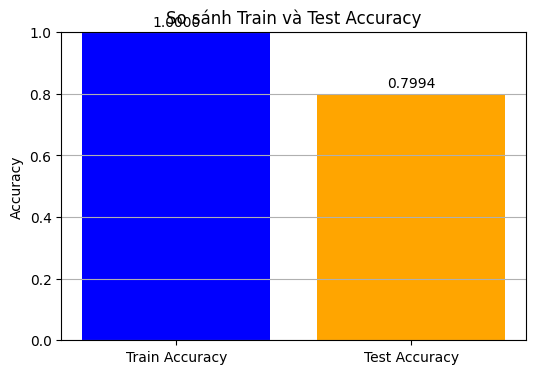

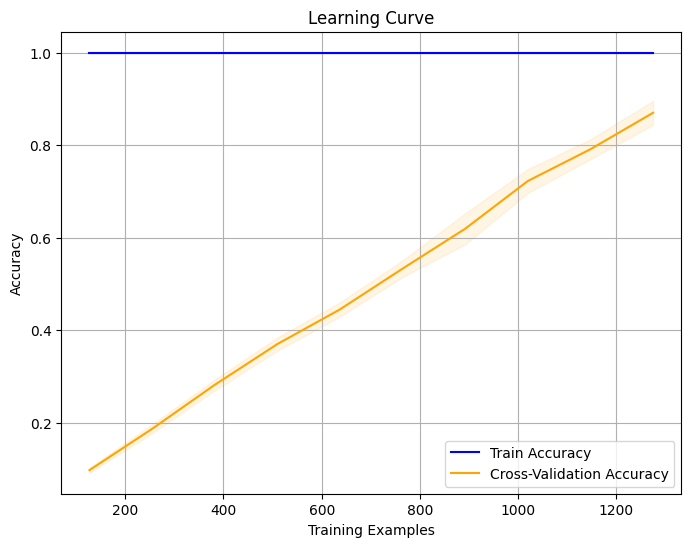

Mô hình đã được lưu vào rf_model.pkl


In [17]:
def train_rf_model():
    

    # Thiết lập tham số tốt nhất cho Random Forest
    params = {
        'bootstrap': False, 
         'max_depth': None, 
        'max_features': 'log2', 
        'min_samples_leaf': 2, 
        'min_samples_split': 2, 
        'n_estimators': 200
    }

    # Tạo mô hình Random Forest (không cần pipeline vì bỏ StandardScaler)
    rf_model = RandomForestClassifier(**params, random_state=42)

    # Huấn luyện mô hình
    print("\nHuấn luyện Random Forest với các tham số tốt nhất...")
    rf_model.fit(X_train, y_train)

    # Đánh giá trên tập train
    train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    print(f"Train Accuracy: {train_accuracy:.4f}")

    # Đánh giá trên tập test
    test_pred = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # In classification report trên tập test
    print("\nClassification Report trên tập test:")
    print(classification_report(y_test, test_pred))

    # In thông tin mẫu đầu tiên
    test_proba = rf_model.predict_proba(X_test)
    first_sample_proba = test_proba[0]
    first_sample_pred = test_pred[0]
    first_sample_true = y_test[0]
    print("\nThông tin mẫu đầu tiên trong tập test:")
    print(f"Xác suất dự đoán: {first_sample_proba} (mỗi giá trị tương ứng với từng lớp)")
    print(f"Nhãn dự đoán: {first_sample_pred}")
    print(f"Nhãn thực tế: {first_sample_true}")

    # --- Thu thập số liệu và vẽ biểu đồ ---

    # 1. Biểu đồ so sánh Train và Test Accuracy
    plt.figure(figsize=(6, 4))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
    plt.title('So sánh Train và Test Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
    plt.grid(True, axis='y')
    plt.show()

    # 2. Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy', color='orange')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='orange')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Lưu mô hình vào file .pkl
    with open('/kaggle/working/rf_model.pkl', 'wb') as file:
        pickle.dump(rf_model, file)
    print("Mô hình đã được lưu vào rf_model.pkl")

train_rf_model()

In [18]:
def grid():

    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    # Initialize model
    rf = RandomForestClassifier(random_state=42)
    
    # GridSearch
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    
   # In tham số tốt nhất và điểm số
    print("\nTham số tốt nhất:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)

    # Đánh giá trên tập train
    train_pred = grid_search.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    print(f"Train Accuracy: {train_accuracy:.4f}")

    # Đánh giá trên tập test
    test_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # In classification report trên tập test
    print("\nClassification Report trên tập test:")
    print(classification_report(y_test, test_pred))

    # Vẽ biểu đồ so sánh train và test accuracy
    plt.figure(figsize=(6, 4))
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
    plt.title('So sánh Train và Test Accuracy (Random Forest)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
    plt.grid(True, axis='y')
    plt.show()

    # In xác suất và nhãn cho mẫu đầu tiên
    test_proba = grid_search.predict_proba(X_test)
    first_sample_proba = test_proba[0]
    first_sample_pred = test_pred[0]
    first_sample_true = y_test[0]
    print("\nThông tin mẫu đầu tiên trong tập test:")
    print(f"Xác suất dự đoán: {first_sample_proba} (mỗi giá trị tương ứng với từng lớp)")
    print(f"Nhãn dự đoán: {first_sample_pred}")
    print(f"Nhãn thực tế: {first_sample_true}")
# grid()